# 5.4 Exercises

## Exercise 1: Correlations

1. Load the `diabetes` dataset from the `sklearn`library and use `dataset.DESCR` to read the dataset description. Understand the variables, their meanings, and how they relate to the medical context (e.g., what each feature like BMI, age, and blood pressure represents in the context of diabetes).
2. Using `pandas`, compute the **correlation matrix** for all features and the target variable (diabetes progression).
3. Create a *heatmap* using `seaborn` to visually display the correlation matrix. Include annotations to display the exact correlation values inside each cell.
4. Analyse the heatmap and identify the variable that shows the highest correlation (positive or negative) with the target variable (diabetes progression).


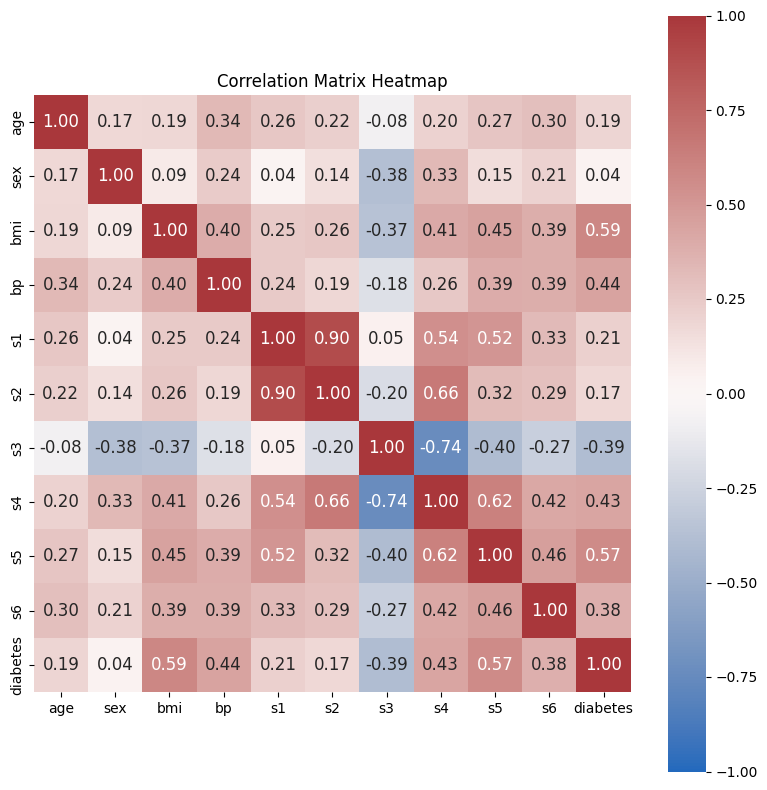

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the diabetes dataset from sklearn
dataset = datasets.load_diabetes(as_frame=True)

# Create observations matrix (X) and target vector (y)
X, y = dataset.data, dataset.target

# Create a unified DataFrame containing both predictors and target
data = pd.concat([X, y.rename('diabetes')], axis=1)


##solution

# Calculate the correlation matrix using pandas (this avoids NumPy)
correlation_matrix = data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Show the values of the correlations
    cmap="vlag",  # Colormap
    vmin=-1,  # Min value for colormap
    vmax=1,  # Max value for colormap
    square=True,  # Square cells
    fmt='.2f',  # Format float to 2 decimal points
    annot_kws={'size': 12},  # Font size of annotations
    xticklabels=correlation_matrix.columns,  # x-axis labels
    yticklabels=correlation_matrix.columns  # y-axis labels
)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()



## Exercise 2: Partial Correaltion
Age could be influencing both BMI and diabetes progression. As people age, both their BMI and risk for diabetes may increase, which could inflate the observed correlation between BMI and diabetes. By holding age constant, we remove its effect and get a clearer picture of the true relationship between BMI and diabetes progression.

1. Use the `Pingouin` library to calculate the **partial correlation** between BMI and diabetes progression, controlling for age.
2. Did the Partial Correlation Decrease after controlling for age? Compare with the original Pearson correaltion.

In [2]:
#solution
import pingouin as pg

# Calculate partial correlation between BMI and diabetes progression, controlling for age
partial_corr = pg.partial_corr(data=data, x='bmi', y='diabetes', covar='age')

# Display the results
print(partial_corr)


           n         r         CI95%         p-val
pearson  442  0.571553  [0.51, 0.63]  1.309246e-39


## Exercise 3: Multiple linear Regression
1. Build a **multiple linear regression model** using the three highest correlated variables as the independent variables and diabetes progression as the dependent variable.
2. What does the **R-squared value** tell you about the model’s performance? 

In [4]:
#solution
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols(formula='diabetes ~ bmi + bp + s5', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           7.16e-62
Time:                        13:49:36   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4813.
Df Residuals:                     438   BIC:                             4830.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.653     57.342      0.0